# <font color='blue'>Revisão Álgebra Linear</font>

## <font color='blue'>Mínimos Quadrados</font>

### <font color='blue'>Solução dos Exercícios</font>

#### Material produzido por Luis Gustavo Nonato
#### ICMC-USP
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercício 1)
Considere a função $f(x)=\exp(-x^2)$, $x\in[0,1]$. Usando o método dos mínimos quadrados, aproxime a função $f(x)$ por um polinômio quadrático e por um polinômio cúbico. Verifique o erro médio quadrático em cada um dos casos.

0.0001268328929439092 1.3399915608756554e-07


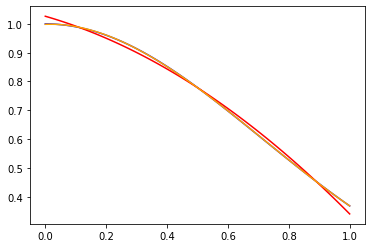

In [21]:
# Solução

t = np.linspace(0,1,100)
f = np.exp(-t**2)

plt.plot(t,f,color='blue')

# polinômio quadratico, montando a matriz 
Aq = np.ones((t.shape[0],3))
Aq[:,1] = t
Aq[:,2] = t**2

# polinômio cubico, montando a matriz 
Ac = np.ones((t.shape[0],4))
Ac[:,1] = t
Ac[:,2] = t**2
Ac[:,3] = t**3

# Resolvendo as equações normais
alphaq = np.linalg.solve(np.dot(Aq.T,Aq),np.dot(Aq.T,f))
alphac = np.linalg.solve(np.dot(Ac.T,Ac),np.dot(Ac.T,f))

yq = np.dot(Aq,alphaq)
yc = np.dot(Ac,alphac)

plt.plot(t,yq,color='red')
plt.plot(t,yc,color='orange')

Erroq = (np.linalg.norm(yq-f)**2)/t.shape[0]
Erroc = (np.linalg.norm(yc-f)**2)/t.shape[0]

print(Erroq,Erroc)

### Exercício 2)
Considere as retas geradas pelas equações paramétricas
$$
\begin{matrix}
\mathbf{r}_1(t)=\mathbf{a}+t\mathbf{v}_1\\
\mathbf{r}_2(t)=\mathbf{b}+t\mathbf{v}_2
\end{matrix}
$$
onde $\mathbf{a}=[1,1,1]$, $\mathbf{b}=[-1,-1,-1]$ são pontos por onde as retas passam e $\mathbf{v}_1=[0,1,0.5]$, $\mathbf{v}_2=[0.5,-1,1]$ são os vetores diretores das retas. O código abaixo ilustra as retas e suas posições no espaço. Calcule a distância entre as retas $\mathbf{r}_1$ e $\mathbf{r}_2$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt 

# elementos que definem a reta
a = np.array([1,1,1]).reshape(3,1)
v1 = np.array([0,1,0.5]).reshape(3,1)

b = np.array([-1,-1,-1]).reshape(3,1)
v2 = np.array([0.5,-1,1]).reshape(3,1)

# gerando pontos sobre as retas
t = np.linspace(-2,2,5)
r1 = a+t*v1
r2 = b+t*v2

# plotando as retas
fig1 = plt.figure()
ax1 = fig1.add_subplot(111,projection='3d')

ax1.plot(r1[0],r1[1],r1[2],color='r')
ax1.plot(r2[0],r2[1],r2[2],color='r')

In [3]:
#Solução

#temos que os vetores diretores geram um plano paralelo as duas retas
# gerando o plano 
normal_t = np.cross(v1.ravel(),v2.ravel())
normal_t = normal_t/np.linalg.norm(normal_t)
xx, yy = np.meshgrid(range(-3,3), range(-3,3))
zz = -(normal_t[0] * xx + normal_t[1] * yy)/normal_t[2]

fig2 = plt.figure()
ax2 = fig2.add_subplot(111,projection='3d')
ax2.plot_surface(xx, yy, zz, alpha=0.2)
ax2.plot(r1[0],r1[1],r1[2],color='r')
ax2.plot(r2[0],r2[1],r2[2],color='r')

In [8]:
# Transladando as retas para que r2 esteja contida no plano
b_t = -b
r1_t = r1 + b_t
r2_t = r2 + b_t

fig3 = plt.figure()
ax3 = fig3.add_subplot(111,projection='3d')
ax3.plot_surface(xx, yy, zz, alpha=0.2)
ax3.plot(r1_t[0],r1_t[1],r1_t[2],color='r')
ax3.plot(r2_t[0],r2_t[1],r2_t[2],color='r')

# Calculando a projeção de um ponto de r1 no plano que contém r2
A = np.zeros((3,2))
A[:,0] = v1.ravel()
A[:,1] = v2.ravel()

x = np.linalg.solve(A.T@A,A.T@r1_t[:,1])
p = A@x

ax3.scatter(p[0],p[1],p[2],color='black',s=7)
ax3.scatter(r1_t[0,1],r1_t[1,1],r1_t[2,1],color='black',s=7)

# Calculando a distancia entre as retas
dist_r1_r2 = np.linalg.norm(p-r1_t[:,1])
print(f"A distancia entre as retas é {dist_r1_r2:.2f}")
pos = p+0.5*dist_r1_r2*normal_t
ax3.text(pos[0],pos[1],pos[2],f"{dist_r1_r2:.2f}")

A distancia entre as retas é 1.5617


Text(1.2682926829268295, 0.8780487804878047, '1.56')

### Exercício 3)
Encontre a matriz de projeção ortogonal de pontos em $\mathbb{R}^3$ sobre o plano dado pela equação $2x-y-z+3=0$. Faça o gráfico do plano e de um conjunto de pontos projetados sobre ele.

In [10]:
# Solução

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt 

# Vamos encontrar uma base para o espaço correspondendo ao plano 2x-y-z+1=0
# e armazena-la como colunas de uma matriz A
# z = 2x-y+3
# pegamos 3 pontos no plano e geramos os vetores

p1 = np.array([0,1,2])
p2 = np.array([1,0,5])
p3 = np.array([1,1,4])
v1 = p2 - p1
v2 = p3 - p1

A = np.zeros((3,2))
A[:,0] = v1
A[:,1] = v2

# gerando o plano 
normal_t = np.cross(A[:,0],A[:,1])
xx, yy = np.meshgrid(range(-3,3), range(-3,3))
zz = -(normal_t[0] * xx + normal_t[1] * yy)/normal_t[2]

# plot do plano
fig1 = plt.figure()
ax1 = fig1.add_subplot(111,projection='3d')
ax1.plot_surface(xx, yy, zz, alpha=0.2)

# plot da origem
ax1.scatter(0,0,0,s=25,color='k')

# plot dos vetores base do plano
x1 = A[:,0]/np.linalg.norm(A[:,0])
x2 = A[:,1]/np.linalg.norm(A[:,1])
ax1.quiver(0, 0, 0, x1[0],x1[1],x1[2],color='blue')
ax1.quiver(0, 0, 0, x2[0],x2[1],x2[2],color='red')

In [11]:
# Definindo 5 pontos quaisque em R3
B = np.random.uniform(-2.9,2.9,size=(3,5))

# Transladando os pontos de acordo com a translação do plano
B_t = B.copy()
B_t = B_t - p1.reshape(3,1)

# Projetando os pontos sobre o plano
# encontrando os coeficientes de cada ponto
x = np.linalg.solve(np.dot(A.T,A),np.dot(A.T,B_t))

# encontrando as projeções
P = np.dot(A,x)

# Transladando os pontos de modo a corresponder a projeção dos pontos originais
P = P + p1.reshape(3,1)

ax1.plot_surface(xx+p1[0], yy+p1[1], zz+p1[2], alpha=0.2)

# plot da origem
ax1.scatter(0,0,0,s=25,color='k')

# Plot dos pontos originais
ax1.scatter(B[0,:],B[1,:],B[2,:],s=25,color='red')
    
# Plot dos pontos projetados
ax1.scatter(P[0,:],P[1,:],P[2,:],s=25,color='blue')
    
# Plot das distancias
for i in range(B.shape[1]):
    ax1.plot([P[0,i],B[0,i]],[P[1,i],B[1,i]],[P[2,i],B[2,i]],color='k',linestyle='--')
    
    
ax1.quiver(p1[0],p1[1],p1[2],normal_t[0],normal_t[1],normal_t[2],color='k')

### Exercício 4)
O método dos mínimos quadrados pode ser difícil de resolver quando as colunas da matriz são quase linearmente dependentes, pois a solução do sistema de equações normais pode ficar instável. A solução típica para este problema é encontrar uma base ortogonal (ortonormal) para o espaço coluna da matriz e utilizar esta base na solução de mínimos quadrados.

Dada a matriz $X$ construída no código abaixo (a segunda coluna é uma perturbação da primeira), encontre uma base ortogonal para as colunas de $X$ e projete o ponto $\mathbf{b}=[1,1,1,1,1]$ sobre o espaço coluna.

In [32]:
import numpy as np

X = np.random.uniform(0,1,size=(5,2))
X[:,1] = X[:,0] + np.random.uniform(-1e-7,1e-7,X.shape[0])

b = np.array([1,1,1,1,1])

**Solução**

Para encontrar a base ortogonal basta calcularmos a decomposição QR da matriz $\mathbf{X}$.

$$
\begin{matrix}
\mathbf{X}=\mathbf{Q}\mathbf{R}\\
\downarrow\\
\mathbf{X}^\top\mathbf{X}\alpha=\mathbf{X}^\top\mathbf{b}\\
\downarrow\\
(\mathbf{Q}\mathbf{R})^\top(\mathbf{Q}\mathbf{R})\alpha = (\mathbf{Q}\mathbf{R})^\top\mathbf{b}\\
\downarrow\\
\mathbf{R}^\top\mathbf{Q}^\top\mathbf{Q}\mathbf{R}\alpha = \mathbf{R}^\top\mathbf{Q}^\top\mathbf{b}\\
\downarrow\\
\mathbf{R}^\top\mathbf{R}\mathbf{\alpha}=\mathbf{R}^\top\mathbf{Q}^\top\mathbf{b}\\
\downarrow\\
\mathbf{R}\mathbf{\alpha}=\mathbf{Q}^\top\mathbf{b}
\end{matrix}
$$

Note que a matriz $\mathbf{R}$ é quadrada com colunas LI, logo o sistema pode ser resolvido diretamente. A projeção de $\mathbf{b}$ será dada por 

$$
\mathbf{p} = \mathbf{Q}\mathbf{R}\mathbf{\alpha}\rightarrow \mathbf{p} =\mathbf{X}\mathbf{\alpha}
$$

In [33]:
# Calculando a decomposição QR

Q,R = np.linalg.qr(X)
print('dimensao de Q',Q.shape)
print('dimensao de R',R.shape)

# projetando o ponto b
alpha = np.linalg.solve(R,np.dot(Q.T,b))
print(alpha)
p = np.dot(X,alpha)
print(p)

dimensao de Q (5, 2)
dimensao de R (2, 2)
[-6690445.15366532  6690447.01496198]
[0.69521205 1.42495238 0.74140561 0.40033543 1.036792  ]


**Obs:** Tente resolver as equações normais utilizando diretamente a matriz $\mathbf{X}$ e veja o que acontece.

In [34]:
alpha2 = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,b))
print(alpha2)
p2 = np.dot(X,alpha2)
print(p2)

[-6693069.80858178  6693071.66981132]
[0.69540636 1.42507204 0.74118273 0.40043147 1.03701834]
